In [2]:
import os
import json
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

# Weighted avg.

In [3]:
import json

with open(r"C:\Users\esual\Documents\local_repos\growth-vs-forgetting\data\results\llm_evaluations\results_DK.json\llm-stacking__LLM_7B_300BToken\results_2025-02-28T19-19-15.925070.json", "r") as f:
    data = json.load(f)

stem_subtasks = data["group_subtasks"]["mmlu_stem"]
print("Subtasks in mmlu_stem:", stem_subtasks)

Subtasks in mmlu_stem: ['mmlu_abstract_algebra', 'mmlu_high_school_chemistry', 'mmlu_college_biology', 'mmlu_computer_security', 'mmlu_college_chemistry', 'mmlu_college_physics', 'mmlu_college_mathematics', 'mmlu_high_school_biology', 'mmlu_machine_learning', 'mmlu_elementary_mathematics', 'mmlu_anatomy', 'mmlu_high_school_mathematics', 'mmlu_college_computer_science', 'mmlu_electrical_engineering', 'mmlu_high_school_computer_science', 'mmlu_astronomy', 'mmlu_conceptual_physics', 'mmlu_high_school_physics', 'mmlu_high_school_statistics']


In [4]:
results = data["results"]
n_samples = data["n-samples"]  # or data["n-samples"], depending on your output; here we'll assume n-shot

# Initialize accumulators
weighted_correct = 0.0
total_samples = 0

for task in stem_subtasks:
    # Get the accuracy for the subtask (e.g. the field "acc,none")
    # We assume the key exists in results[task] as "acc,none"
    subtask_result = results.get(task, {})
    accuracy = subtask_result.get("acc,none", None)
    
    # Get the effective sample count for the subtask
    subtask_samples = n_samples.get(task, {})
    effective_samples = subtask_samples.get("effective", None)
    
    if accuracy is None or effective_samples is None:
        print(f"Warning: Missing data for {task}")
        continue
    
    # Compute number of correct answers for this subtask
    weighted_correct += accuracy * effective_samples
    total_samples += effective_samples

print(f"Total effective samples: {total_samples}")


Total effective samples: 3153


In [5]:
if total_samples > 0:
    weighted_accuracy = weighted_correct / total_samples
    print(f"Weighted Overall Accuracy for mmlu_stem: {weighted_accuracy:.4f}")
else:
    print("No samples available to compute weighted accuracy.")


Weighted Overall Accuracy for mmlu_stem: 0.2718


In [6]:
stem_subtasks = data["group_subtasks"]["mmlu_humanities"]
print("Subtasks in mmlu_humanities:", stem_subtasks)

results = data["results"]
n_samples = data["n-samples"]  # or data["n-samples"], depending on your output; here we'll assume n-shot

# Initialize accumulators
weighted_correct = 0.0
total_samples = 0

for task in stem_subtasks:
    #print(task)
    # Get the accuracy for the subtask (e.g. the field "acc,none")
    # We assume the key exists in results[task] as "acc,none"
    subtask_result = results.get(task, {})
    accuracy = subtask_result.get("acc,none", None)
    
    # Get the effective sample count for the subtask
    subtask_samples = n_samples.get(task, {})
    effective_samples = subtask_samples.get("effective", None)
    
    if accuracy is None or effective_samples is None:
        print(f"Warning: Missing data for {task}")
        continue
    
    # Compute number of correct answers for this subtask
    weighted_correct += accuracy * effective_samples
    total_samples += effective_samples

print(f"Total effective samples: {total_samples}")

if total_samples > 0:
    weighted_accuracy = weighted_correct / total_samples
    print(f"Weighted Overall Accuracy for mmlu_humanities: {weighted_accuracy:.4f}")
else:
    print("No samples available to compute weighted accuracy.")


Subtasks in mmlu_humanities: ['mmlu_international_law', 'mmlu_world_religions', 'mmlu_high_school_world_history', 'mmlu_formal_logic', 'mmlu_philosophy', 'mmlu_moral_disputes', 'mmlu_professional_law', 'mmlu_high_school_us_history', 'mmlu_moral_scenarios', 'mmlu_logical_fallacies', 'mmlu_jurisprudence', 'mmlu_high_school_european_history', 'mmlu_prehistory']
Total effective samples: 4705
Weighted Overall Accuracy for mmlu_humanities: 0.2417


In [7]:
round(data['results']['mmlu_humanities']['acc,none'], 4)

0.2417

# same above but for bias

In [ ]:
import json
import math

# Paste your JSON data as a Python string or load it from a file.
import json

# Load the JSON data from file
with open("crows_pairs.json", "r") as f:
    data = json.load(f)

results = data["results"]
n_samples = data["n-samples"]

# Identify all English subtask keys (excluding the aggregate "crows_pairs_english")
subtask_keys = [key for key in results if key.startswith("crows_pairs_english_")]

def weighted_average(metric, keys):
    total_weight = 0
    weighted_sum = 0
    for key in keys:
        # Get the effective sample count for the current key
        sample_count = n_samples[key]["effective"]
        value = results[key][metric]
        weighted_sum += value * sample_count
        total_weight += sample_count
    return weighted_sum / total_weight if total_weight else None

# Calculate the weighted averages for the desired metrics
weighted_likelihood_diff = weighted_average("likelihood_diff,none", subtask_keys)
weighted_pct_stereotype = weighted_average("pct_stereotype,none", subtask_keys)

# Retrieve the aggregate values from the "crows_pairs_english" entry
agg_likelihood_diff = results["crows_pairs_english"]["likelihood_diff,none"]
agg_pct_stereotype = results["crows_pairs_english"]["pct_stereotype,none"]

print("Weighted average of likelihood_diff:", weighted_likelihood_diff)
print("Aggregate likelihood_diff from crows_pairs_english:", agg_likelihood_diff)
print()
print("Weighted average of pct_stereotype:", weighted_pct_stereotype)
print("Aggregate pct_stereotype from crows_pairs_english:", agg_pct_stereotype)



Weighted average of likelihood_diff: 3.6582345801561886
Aggregate likelihood_diff from crows_pairs_english: 3.6991610723232755

Weighted average of pct_stereotype: 0.6141368338344279
Aggregate pct_stereotype from crows_pairs_english: 0.607036374478235


In [167]:
import json

# Load the JSON data from file
with open(r"C:\Users\esual\Documents\local_repos\growth-vs-forgetting\data\results\llm_evaluations\results_Bias.json\llm-stacking__LLM_7B_300BToken\results_2025-02-28T19-21-58.226328.json", "r") as f:
    data = json.load(f)

results = data["results"]
n_samples = data["n-samples"]

# Identify all English subtask keys (excluding the aggregate "crows_pairs_english")
subtask_keys = [key for key in results if key.startswith("crows_pairs_english_")]

def weighted_average(metric, keys):
    total_weight = 0
    weighted_sum = 0
    for key in keys:
        # Get the effective sample count for the current key
        sample_count = n_samples[key]["effective"]
        value = results[key][metric]
        weighted_sum += value * sample_count
        total_weight += sample_count
    return weighted_sum / total_weight if total_weight else None

# Calculate the weighted averages for the desired metrics
weighted_likelihood_diff = weighted_average("likelihood_diff,none", subtask_keys)
weighted_pct_stereotype = weighted_average("pct_stereotype,none", subtask_keys)

# Retrieve the aggregate values from the "crows_pairs_english" entry
agg_likelihood_diff = results["crows_pairs_english"]["likelihood_diff,none"]
agg_pct_stereotype = results["crows_pairs_english"]["pct_stereotype,none"]

print("Weighted average of likelihood_diff:", weighted_likelihood_diff)
print("Aggregate likelihood_diff from crows_pairs_english:", agg_likelihood_diff)
print()
print("Weighted average of pct_stereotype:", weighted_pct_stereotype)
print("Aggregate pct_stereotype from crows_pairs_english:", agg_pct_stereotype)


Weighted average of likelihood_diff: 3.608619521612487
Aggregate likelihood_diff from crows_pairs_english: 3.6070929466434087

Weighted average of pct_stereotype: 0.6338700059630292
Aggregate pct_stereotype from crows_pairs_english: 0.6338700059630292


In [168]:
subtask_keys

['crows_pairs_english_age',
 'crows_pairs_english_autre',
 'crows_pairs_english_disability',
 'crows_pairs_english_gender',
 'crows_pairs_english_nationality',
 'crows_pairs_english_physical_appearance',
 'crows_pairs_english_race_color',
 'crows_pairs_english_religion',
 'crows_pairs_english_sexual_orientation',
 'crows_pairs_english_socioeconomic']

In [9]:

def compute_fg_metric(df, reference_model, metric_column="likelihood_diff,none"):
    """
    Computes the FG metric across tasks for each (model, category), comparing
    the specified 'metric_column' value to that of a 'reference_model'.
    
    The FG formula (per your snippet) for each task i is:
        FG_i = ((R^g_i - R^m_i) / R^g_i) * 100
    where R^g_i is the reference model's performance, and R^m_i is the current model's performance.
    
    We'll then average FG_i across tasks for each model & category.
    
    Returns a DataFrame with columns:
      [model, category, FG (averaged), # tasks included, ...]
    """
    # First, isolate the reference model's rows
    ref_df = df[df["model"] == reference_model].copy()
    
    # We only need [category, task, metric_column] from the reference
    ref_df = ref_df[["category", "task", metric_column]].rename(
        columns={metric_column: metric_column + "_ref"}
    )
    
    # Merge original df with reference df on [category, task]
    merged = df.merge(ref_df, on=["category", "task"], how="inner", suffixes=("", "_ref"))
    
    # Exclude rows where the model is actually the reference (no need to compare reference to itself)
    merged = merged[merged["model"] != reference_model].copy()
    
    # Compute FG per row (per task)
    # FG = ((R^g - R^m) / R^g) * 100
    # Where R^g = merged[metric_column + "_ref"] (the reference's metric)
    #       R^m = merged[metric_column] (this model's metric)
    # NOTE: If your metric is an error metric or "lower is better", you might want the sign reversed.
    #       Adjust accordingly.
    merged["FG"] = ((merged[metric_column + "_ref"] - merged[metric_column]) 
                    / merged[metric_column + "_ref"]) * 100
    
    # Now group by (model, category) to average across tasks
    fg_summary = merged.groupby(["model", "category"], as_index=False).agg(
        FG_mean=("FG", "mean"),
        FG_std=("FG", "std"),
        tasks_count=("task", "count")
    )
    
    return fg_summary

In [10]:
# Example usage:
base_dir = r"C:\Users\esual\Documents\local_repos\growth-vs-forgetting\data\results\stack_evaluations"

# 1. Collect all results into a DataFrame
df_metrics = collect_results_into_table(base_dir)

# 2. Suppose you have a known reference model's name:
reference_model_name = "llm-stacking/StackLLM_7B_300BToken"

# 3. Compute FG for 'likelihood_diff,none' comparing each model to the reference
df_fg = compute_fg_metric(df_metrics, reference_model=reference_model_name,
                          metric_column="likelihood_diff,none")

# Now you have two tables in memory:
# df_metrics => the raw table of metrics
# df_fg      => the FG metric summary

# You can inspect them, print them, or save them as you wish.
print("=== Raw Metrics Table ===")
print(df_metrics.head())

print("\n=== FG Metric Summary ===")
print(df_fg.head())


=== Raw Metrics Table ===
            category                               model  \
0  results_Bias.json  llm-stacking/StackLLM_7B_300BToken   
1  results_Bias.json  llm-stacking/StackLLM_7B_300BToken   
2  results_Bias.json  llm-stacking/StackLLM_7B_300BToken   
3  results_Bias.json  llm-stacking/StackLLM_7B_300BToken   
4  results_Bias.json  llm-stacking/StackLLM_7B_300BToken   

                             task total_evaluation_time_seconds  \
0             crows_pairs_english            152.46037297998555   
1         crows_pairs_english_age            152.46037297998555   
2       crows_pairs_english_autre            152.46037297998555   
3  crows_pairs_english_disability            152.46037297998555   
4      crows_pairs_english_gender            152.46037297998555   

   likelihood_diff,none  likelihood_diff_stderr,none  pct_stereotype,none  \
0              3.699161                     0.104245             0.607036   
1              3.898430                     0.388829    

In [11]:
# Example usage:
base_dir = r"C:\Users\esual\Documents\local_repos\growth-vs-forgetting\data\results\stack_evaluations"

# 1. Collect all results into a DataFrame
df_metrics = collect_results_into_table(base_dir)

In [12]:
# Example usage:
base_dir = r"C:\Users\esual\Documents\local_repos\growth-vs-forgetting\data\results\llm_evaluations"

# 1. Collect all results into a DataFrame
df_metrics_llm = collect_results_into_table(base_dir)

In [13]:
df_metrics

,category,model,task,total_evaluation_time_seconds,"likelihood_diff,none","likelihood_diff_stderr,none","pct_stereotype,none","pct_stereotype_stderr,none","acc,none","acc_stderr,none","acc_norm,none","acc_norm_stderr,none","r@1,none","r@1_stderr,none","r@2,none","r@2_stderr,none","mrr,none","mrr_stderr,none"
0,results_Bias.json,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english,152.46037297998555,3.699161,0.104245,0.607036,0.011930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,results_Bias.json,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english_age,152.46037297998555,3.898430,0.388829,0.692308,0.048650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,results_Bias.json,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english_autre,152.46037297998555,5.022820,2.150788,0.636364,0.152120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,results_Bias.json,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english_disability,152.46037297998555,5.750080,0.640899,0.753846,0.053846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,results_Bias.json,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english_gender,152.46037297998555,2.997492,0.230166,0.659375,0.026534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,results_Rs.json,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,hellaswag,629.3832901141141,NaN,NaN,NaN,NaN,0.454093,0.004969,0.598984,0.004891,NaN,NaN,NaN,NaN,NaN,NaN
356,results_Rs.json,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,mathqa,629.3832901141141,NaN,NaN,NaN,NaN,0.246231,0.007887,0.248576,0.007912,NaN,NaN,NaN,NaN,NaN,NaN
357,results_Rs.json,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,mutual,629.3832901141141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225734,0.014053,0.426637,0.016625,0.650395,0.010472
358,results_Rs.json,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,piqa,629.3832901141141,NaN,NaN,NaN,NaN,0.702938,0.010662,0.720348,0.010472,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_all = pd.concat([df_metrics, df_metrics_llm])
df_all['category'] = df_all['category'].str.replace('.json', '').str.split('_').str[1]

In [15]:
df_all['model_'] = df_all.model.apply(lambda x: x.split('/')[-2] if 'llm-stacking' not in x else x.split('/')[-1])
df_all.rename(columns={'model':'model_long', 'model_': 'model'}, inplace=True)

In [16]:
import numpy as np
df_all['model'] = np.where(df_all['model']=="stack_7b_m3_prompt_2", 'stack_7b_m3_prompt', df_all['model'])

In [17]:
df_all['model_type'] = df_all.model.apply(lambda x: 'Stacked' if 'stack' in x.lower() else 'LLM')
df_all['model_order'] = df_all.model.apply(lambda x: x.split('_')[-2][1] if 'm' in x else '0')

In [18]:
df_all.model_order.unique()

array(['0', '1', '2', '3'], dtype=object)

In [19]:
for i in df_all.model.unique():
    print(i.split('_')[-2][1])

B
1
2
3
B
1
2
3


In [20]:
df_all.columns = df_all.columns.str.replace(',none', '')

In [21]:
df_all.category.unique()

array(['Bias', 'DK', 'RC', 'Rs'], dtype=object)

In [22]:
'mmlu_stem' in df_all.query('model == "LLM_7B_300BToken" and category == "RC"').task.unique()

False

In [23]:
mapping = {}
for i, key in df_all[['category', 'task']].drop_duplicates().iterrows():
    if key['category'] == 'Bias':
        mapping[key['task']] = 'pct_stereotype'
    elif key['category'] == 'Rs':
        if key['task'] == 'mutual':
            mapping[key['task']] = 'r@1'
        else:
            mapping[key['task']] = 'acc'
    elif key['category'] == 'RC':
        mapping[key['task']] = 'acc'
    elif key['category'] == 'DK':
        if key['task'] in ['mmlu_stem', 'mmlu_humanities', 'mmlu_social_sciences', 'mmlu_other']:
            mapping[key['task']] = 'acc'

In [24]:
df_all.columns

Index(['category', 'model_long', 'task', 'total_evaluation_time_seconds',
       'likelihood_diff', 'likelihood_diff_stderr', 'pct_stereotype',
       'pct_stereotype_stderr', 'acc', 'acc_stderr', 'acc_norm',
       'acc_norm_stderr', 'r@1', 'r@1_stderr', 'r@2', 'r@2_stderr', 'mrr',
       'mrr_stderr', 'model', 'model_type', 'model_order'],
      dtype='object')

In [25]:
mapping_std = {}
for i, key in df_all[['category', 'task']].drop_duplicates().iterrows():
    if key['category'] == 'Bias':
        mapping_std[key['task']] = 'likelihood_diff_stderr'
    elif key['category'] == 'Rs':
        if key['task'] == 'mutual':
            mapping_std[key['task']] = 'r@1_stderr'
        else:
            mapping_std[key['task']] = 'acc_stderr'
    elif key['category'] == 'RC':
        mapping_std[key['task']] = 'acc_stderr'
    elif key['category'] == 'DK':
        if key['task'] in ['mmlu_stem', 'mmlu_humanities', 'mmlu_social_sciences', 'mmlu_other']:
            mapping_std[key['task']] = 'acc_stderr'

In [26]:
df_all['metric'] = df_all.apply(lambda row: row[mapping[row['task']]] if row['task'] in mapping else None, axis=1)

In [27]:
df_all['metric_std'] = df_all.apply(lambda row: row[mapping_std[row['task']]] if row['task'] in mapping_std else None, axis=1)

In [28]:
df_all.head()

,category,model_long,task,total_evaluation_time_seconds,likelihood_diff,likelihood_diff_stderr,pct_stereotype,pct_stereotype_stderr,acc,acc_stderr,...,r@1_stderr,r@2,r@2_stderr,mrr,mrr_stderr,model,model_type,model_order,metric,metric_std
0,Bias,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english,152.46037297998555,3.699161,0.104245,0.607036,0.011930,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,StackLLM_7B_300BToken,Stacked,0,0.607036,0.104245
1,Bias,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english_age,152.46037297998555,3.898430,0.388829,0.692308,0.048650,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,StackLLM_7B_300BToken,Stacked,0,0.692308,0.388829
2,Bias,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english_autre,152.46037297998555,5.022820,2.150788,0.636364,0.152120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,StackLLM_7B_300BToken,Stacked,0,0.636364,2.150788
3,Bias,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english_disability,152.46037297998555,5.750080,0.640899,0.753846,0.053846,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,StackLLM_7B_300BToken,Stacked,0,0.753846,0.640899
4,Bias,llm-stacking/StackLLM_7B_300BToken,crows_pairs_english_gender,152.46037297998555,2.997492,0.230166,0.659375,0.026534,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,StackLLM_7B_300BToken,Stacked,0,0.659375,0.230166


In [29]:
df_all.dropna(subset=['metric']).pivot_table(columns='model', index=['category','task'], values='metric', aggfunc='sum').reset_index()

model,category,task,LLM_7B_300BToken,StackLLM_7B_300BToken,llm_7b_m1_prompt,llm_7b_m2_prompt,llm_7b_m3_prompt,stack_7b_m1_prompt,stack_7b_m2_prompt,stack_7b_m3_prompt
0,Bias,crows_pairs_english,0.633870,0.607036,0.564699,0.569469,0.558140,0.622540,0.601073,0.612999
1,Bias,crows_pairs_english_age,0.692308,0.692308,0.648352,0.593407,0.615385,0.681319,0.560440,0.604396
2,Bias,crows_pairs_english_autre,0.727273,0.636364,0.636364,0.545455,0.545455,0.727273,0.727273,0.727273
3,Bias,crows_pairs_english_disability,0.738462,0.753846,0.692308,0.646154,0.707692,0.707692,0.692308,0.723077
4,Bias,crows_pairs_english_gender,0.612500,0.659375,0.568750,0.600000,0.587500,0.600000,0.581250,0.609375
5,Bias,crows_pairs_english_nationality,0.574074,0.546296,0.532407,0.509259,0.481481,0.583333,0.537037,0.537037
6,Bias,crows_pairs_english_physical_appearance,0.708333,0.722222,0.722222,0.708333,0.680556,0.722222,0.625000,0.611111
7,Bias,crows_pairs_english_race_color,0.555118,0.496063,0.460630,0.474409,0.454724,0.529528,0.543307,0.547244
8,Bias,crows_pairs_english_religion,0.801802,0.738739,0.630631,0.567568,0.567568,0.693694,0.666667,0.702703
9,Bias,crows_pairs_english_sexual_orientation,0.795699,0.698925,0.698925,0.741935,0.720430,0.849462,0.838710,0.795699


In [30]:
df_all_clean = df_all[['model_type', 'model_order', 'model', 'category', 'task', 'metric', 'metric_std']]
df_all_clean = df_all_clean.dropna(subset=['metric'])
df_all_clean['metric'] = df_all_clean['metric'].astype(float)
df_all_clean['metric_std'] = df_all_clean['metric_std'].astype(float)

df_all_clean

,model_type,model_order,model,category,task,metric,metric_std
0,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english,0.607036,0.104245
1,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english_age,0.692308,0.388829
2,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english_autre,0.636364,2.150788
3,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english_disability,0.753846,0.640899
4,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english_gender,0.659375,0.230166
...,...,...,...,...,...,...,...
355,LLM,3,llm_7b_m3_prompt,Rs,hellaswag,0.420733,0.004927
356,LLM,3,llm_7b_m3_prompt,Rs,mathqa,0.222446,0.007613
357,LLM,3,llm_7b_m3_prompt,Rs,mutual,0.225734,0.014053
358,LLM,3,llm_7b_m3_prompt,Rs,piqa,0.683351,0.010853


In [31]:
df_llm = df_all_clean.query('model_type == "LLM"')
df_stacked = df_all_clean.query('model_type == "Stacked"')

In [32]:
df_llm.drop_duplicates()

,model_type,model_order,model,category,task,metric,metric_std
0,LLM,0,LLM_7B_300BToken,Bias,crows_pairs_english,0.633870,0.099445
1,LLM,0,LLM_7B_300BToken,Bias,crows_pairs_english_age,0.692308,0.398589
2,LLM,0,LLM_7B_300BToken,Bias,crows_pairs_english_autre,0.727273,2.329856
3,LLM,0,LLM_7B_300BToken,Bias,crows_pairs_english_disability,0.738462,0.637385
4,LLM,0,LLM_7B_300BToken,Bias,crows_pairs_english_gender,0.612500,0.208524
...,...,...,...,...,...,...,...
355,LLM,3,llm_7b_m3_prompt,Rs,hellaswag,0.420733,0.004927
356,LLM,3,llm_7b_m3_prompt,Rs,mathqa,0.222446,0.007613
357,LLM,3,llm_7b_m3_prompt,Rs,mutual,0.225734,0.014053
358,LLM,3,llm_7b_m3_prompt,Rs,piqa,0.683351,0.010853


In [33]:
df_pivot_llm = df_llm.drop_duplicates().pivot(index=['category','task'], columns='model_order', values='metric')
df_pivot_stacked = df_stacked.drop_duplicates().pivot(index=['category','task'], columns='model_order', values='metric')

In [34]:
df_pivot_llm

model_order                                              0         1  \
category task                                                          
Bias     crows_pairs_english                      0.633870  0.564699   
         crows_pairs_english_age                  0.692308  0.648352   
         crows_pairs_english_autre                0.727273  0.636364   
         crows_pairs_english_disability           0.738462  0.692308   
         crows_pairs_english_gender               0.612500  0.568750   
         crows_pairs_english_nationality          0.574074  0.532407   
         crows_pairs_english_physical_appearance  0.708333  0.722222   
         crows_pairs_english_race_color           0.555118  0.460630   
         crows_pairs_english_religion             0.801802  0.630631   
         crows_pairs_english_sexual_orientation   0.795699  0.698925   
         crows_pairs_english_socioeconomic        0.673684  0.615789   
         crows_pairs_french                       0.515802  0.493739   
         crows_pairs_french_age                   0.533333  0.477778   
         crows_pairs_french_autre                 0.461538  0.538462   
         crows_pairs_french_disability            0.545455  0.484848   
         crows_pairs_french_gender                0.498442  0.498442   
         crows_pairs_french_nationality           0.355731  0.387352   
         crows_pairs_french_physical_appearance   0.513889  0.541667   
         crows_pairs_french_race_color            0.486957  0.493478   
         crows_pairs_french_religion              0.582609  0.556522   
         crows_pairs_french_sexual_orientation    0.791209  0.813187   
         crows_pairs_french_socioeconomic         0.637755  0.423469   
DK       mmlu_humanities                          0.241658  0.240808   
         mmlu_other                               0.271645  0.245575   
         mmlu_social_sciences                     0.227494  0.266168   
         mmlu_stem                                0.271805  0.261973   
RC       race                                     0.371292  0.325359   
Rs       boolq                                    0.623547  0.476453   
         hellaswag                                0.479586  0.426807   
         mathqa                                   0.233501  0.239196   
         mutual                                   0.225734  0.225734   
         piqa                                     0.743199  0.696409   
         winogrande                               0.609313  0.560379   

model_order                                              2         3  
category task                                                         
Bias     crows_pairs_english                      0.569469  0.558140  
         crows_pairs_english_age                  0.593407  0.615385  
         crows_pairs_english_autre                0.545455  0.545455  
         crows_pairs_english_disability           0.646154  0.707692  
         crows_pairs_english_gender               0.600000  0.587500  
         crows_pairs_english_nationality          0.509259  0.481481  
         crows_pairs_english_physical_appearance  0.708333  0.680556  
         crows_pairs_english_race_color           0.474409  0.454724  
         crows_pairs_english_religion             0.567568  0.567568  
         crows_pairs_english_sexual_orientation   0.741935  0.720430  
         crows_pairs_english_socioeconomic        0.668421  0.663158  
         crows_pairs_french                       0.493143  0.493739  
         crows_pairs_french_age                   0.522222  0.488889  
         crows_pairs_french_autre                 0.538462  0.692308  
         crows_pairs_french_disability            0.484848  0.424242  
         crows_pairs_french_gender                0.436137  0.492212  
         crows_pairs_french_nationality           0.395257  0.375494  
         crows_pairs_french_physical_appearance   0.541667  0.569444  
         crows_pairs_french_race_color            0.563043 

In [35]:
df_pivot_llm

model_order                                              0         1  \
category task                                                          
Bias     crows_pairs_english                      0.633870  0.564699   
         crows_pairs_english_age                  0.692308  0.648352   
         crows_pairs_english_autre                0.727273  0.636364   
         crows_pairs_english_disability           0.738462  0.692308   
         crows_pairs_english_gender               0.612500  0.568750   
         crows_pairs_english_nationality          0.574074  0.532407   
         crows_pairs_english_physical_appearance  0.708333  0.722222   
         crows_pairs_english_race_color           0.555118  0.460630   
         crows_pairs_english_religion             0.801802  0.630631   
         crows_pairs_english_sexual_orientation   0.795699  0.698925   
         crows_pairs_english_socioeconomic        0.673684  0.615789   
         crows_pairs_french                       0.515802  0.493739   
         crows_pairs_french_age                   0.533333  0.477778   
         crows_pairs_french_autre                 0.461538  0.538462   
         crows_pairs_french_disability            0.545455  0.484848   
         crows_pairs_french_gender                0.498442  0.498442   
         crows_pairs_french_nationality           0.355731  0.387352   
         crows_pairs_french_physical_appearance   0.513889  0.541667   
         crows_pairs_french_race_color            0.486957  0.493478   
         crows_pairs_french_religion              0.582609  0.556522   
         crows_pairs_french_sexual_orientation    0.791209  0.813187   
         crows_pairs_french_socioeconomic         0.637755  0.423469   
DK       mmlu_humanities                          0.241658  0.240808   
         mmlu_other                               0.271645  0.245575   
         mmlu_social_sciences                     0.227494  0.266168   
         mmlu_stem                                0.271805  0.261973   
RC       race                                     0.371292  0.325359   
Rs       boolq                                    0.623547  0.476453   
         hellaswag                                0.479586  0.426807   
         mathqa                                   0.233501  0.239196   
         mutual                                   0.225734  0.225734   
         piqa                                     0.743199  0.696409   
         winogrande                               0.609313  0.560379   

model_order                                              2         3  
category task                                                         
Bias     crows_pairs_english                      0.569469  0.558140  
         crows_pairs_english_age                  0.593407  0.615385  
         crows_pairs_english_autre                0.545455  0.545455  
         crows_pairs_english_disability           0.646154  0.707692  
         crows_pairs_english_gender               0.600000  0.587500  
         crows_pairs_english_nationality          0.509259  0.481481  
         crows_pairs_english_physical_appearance  0.708333  0.680556  
         crows_pairs_english_race_color           0.474409  0.454724  
         crows_pairs_english_religion             0.567568  0.567568  
         crows_pairs_english_sexual_orientation   0.741935  0.720430  
         crows_pairs_english_socioeconomic        0.668421  0.663158  
         crows_pairs_french                       0.493143  0.493739  
         crows_pairs_french_age                   0.522222  0.488889  
         crows_pairs_french_autre                 0.538462  0.692308  
         crows_pairs_french_disability            0.484848  0.424242  
         crows_pairs_french_gender                0.436137  0.492212  
         crows_pairs_french_nationality           0.395257  0.375494  
         crows_pairs_french_physical_appearance   0.541667  0.569444  
         crows_pairs_french_race_color            0.563043 

In [36]:
df_pivot_llm.iloc[:,0]

category  task                                   
Bias      crows_pairs_english                        0.633870
          crows_pairs_english_age                    0.692308
          crows_pairs_english_autre                  0.727273
          crows_pairs_english_disability             0.738462
          crows_pairs_english_gender                 0.612500
          crows_pairs_english_nationality            0.574074
          crows_pairs_english_physical_appearance    0.708333
          crows_pairs_english_race_color             0.555118
          crows_pairs_english_religion               0.801802
          crows_pairs_english_sexual_orientation     0.795699
          crows_pairs_english_socioeconomic          0.673684
          crows_pairs_french                         0.515802
          crows_pairs_french_age                     0.533333
          crows_pairs_french_autre                   0.461538
          crows_pairs_french_disability              0.545455
          crows_pair

In [37]:
(-1*(df_pivot_llm.div(df_pivot_llm.iloc[:,0], axis=0) - 1).sum(axis=1)).to_clipboard()

In [38]:
(-1*(df_pivot_stacked.div(df_pivot_stacked.iloc[:,0], axis=0) - 1).sum(axis=1)).to_clipboard()

In [39]:
-1*(df_pivot_stacked.div(df_pivot_stacked.iloc[:,0], axis=0) - 1)

model_order                                         0         1         2  \
category task                                                               
Bias     crows_pairs_english                     -0.0 -0.025540  0.009823   
         crows_pairs_english_age                 -0.0  0.015873  0.190476   
         crows_pairs_english_autre               -0.0 -0.142857 -0.142857   
         crows_pairs_english_disability          -0.0  0.061224  0.081633   
         crows_pairs_english_gender              -0.0  0.090047  0.118483   
         crows_pairs_english_nationality         -0.0 -0.067797  0.016949   
         crows_pairs_english_physical_appearance -0.0 -0.000000  0.134615   
         crows_pairs_english_race_color          -0.0 -0.067460 -0.095238   
         crows_pairs_english_religion            -0.0  0.060976  0.097561   
         crows_pairs_english_sexual_orientation  -0.0 -0.215385 -0.200000   
         crows_pairs_english_socioeconomic       -0.0 -0.127119 -0.093220   
         crows_pairs_french                      -0.0  0.009467 -0.030769   
         crows_pairs_french_age                  -0.0 -0.000000  0.020408   
         crows_pairs_french_autre                -0.0 -0.400000 -0.200000   
         crows_pairs_french_disability           -0.0  0.054054  0.108108   
         crows_pairs_french_gender               -0.0  0.102410  0.114458   
         crows_pairs_french_nationality          -0.0 -0.133333 -0.188889   
         crows_pairs_french_physical_appearance  -0.0 -0.125000 -0.075000   
         crows_pairs_french_race_color           -0.0 -0.057895 -0.273684   
         crows_pairs_french_religion             -0.0  0.074074  0.185185   
         crows_pairs_french_sexual_orientation   -0.0 -0.027027 -0.081081   
         crows_pairs_french_socioeconomic        -0.0  0.140351  0.122807   
DK       mmlu_humanities                         -0.0 -0.013228 -0.028219   
         mmlu_other                              -0.0 -0.098113 -0.060377   
         mmlu_social_sciences                    -0.0 -0.104520 -0.295198   
         mmlu_stem                               -0.0  0.024570 -0.074939   
RC       race                                    -0.0  0.049479  0.070312   
Rs       boolq                                   -0.0  0.127230  0.116432   
         hellaswag                               -0.0  0.097928  0.102228   
         mathqa                                  -0.0  0.055480  0.005413   
         mutual                                  -0.0 -0.000000 -0.000000   
         piqa                                    -0.0  0.067870  0.067148   
         winogrande                              -0.0  0.077111  0.094247   

model_order                                              3  
category task                                               
Bias     crows_pairs_english                     -0.009823  
         crows_pairs_english_age                  0.126984  
         crows_pairs_english_autre               -0.142857  
         crows_pairs_english_disability           0.040816  
         crows_pairs_english_gender               0.075829  
         crows_pairs_english_nationality          0.016949  
         crows_pairs_english_physical_appearance  0.153846  
         crows_pairs_english_race_color          -0.103175  
         crows_pairs_english_religion             0.048780  
         crows_pairs_english_sexual_orientation  -0.138462  
         crows_pairs_english_socioeconomic       -0.127119  
         crows_pairs_french                      -0.036686  
         crows_pairs_french_age                  -0.102041  
         crows_pairs_french_autre                -0.400000  
         crows_pairs_french_disability            0.108108  
         crows_pairs_french_gender                0.048193  
         crows_pairs_french_nationality          -0.211111  
         crows_pairs_french_physical_appearance  -0.125000  
         crows_pairs_french_race_color           -0.189474  
         crows_pairs_fr

In [40]:
rel_drops = {}
for col in df_pivot_llm.columns:
    if col != '0':
        rel_drops[col] = (df_pivot_llm['0'] - df_pivot_llm[col]) / df_pivot_llm['0']

df_rel_drops = pd.DataFrame(rel_drops)
df_pivot_llm['FG'] = df_rel_drops.mean(axis=1) * 100

In [41]:
df_pivot_llm

model_order                                              0         1  \
category task                                                          
Bias     crows_pairs_english                      0.633870  0.564699   
         crows_pairs_english_age                  0.692308  0.648352   
         crows_pairs_english_autre                0.727273  0.636364   
         crows_pairs_english_disability           0.738462  0.692308   
         crows_pairs_english_gender               0.612500  0.568750   
         crows_pairs_english_nationality          0.574074  0.532407   
         crows_pairs_english_physical_appearance  0.708333  0.722222   
         crows_pairs_english_race_color           0.555118  0.460630   
         crows_pairs_english_religion             0.801802  0.630631   
         crows_pairs_english_sexual_orientation   0.795699  0.698925   
         crows_pairs_english_socioeconomic        0.673684  0.615789   
         crows_pairs_french                       0.515802  0.493739   
         crows_pairs_french_age                   0.533333  0.477778   
         crows_pairs_french_autre                 0.461538  0.538462   
         crows_pairs_french_disability            0.545455  0.484848   
         crows_pairs_french_gender                0.498442  0.498442   
         crows_pairs_french_nationality           0.355731  0.387352   
         crows_pairs_french_physical_appearance   0.513889  0.541667   
         crows_pairs_french_race_color            0.486957  0.493478   
         crows_pairs_french_religion              0.582609  0.556522   
         crows_pairs_french_sexual_orientation    0.791209  0.813187   
         crows_pairs_french_socioeconomic         0.637755  0.423469   
DK       mmlu_humanities                          0.241658  0.240808   
         mmlu_other                               0.271645  0.245575   
         mmlu_social_sciences                     0.227494  0.266168   
         mmlu_stem                                0.271805  0.261973   
RC       race                                     0.371292  0.325359   
Rs       boolq                                    0.623547  0.476453   
         hellaswag                                0.479586  0.426807   
         mathqa                                   0.233501  0.239196   
         mutual                                   0.225734  0.225734   
         piqa                                     0.743199  0.696409   
         winogrande                               0.609313  0.560379   

model_order                                              2         3  \
category task                                                          
Bias     crows_pairs_english                      0.569469  0.558140   
         crows_pairs_english_age                  0.593407  0.615385   
         crows_pairs_english_autre                0.545455  0.545455   
         crows_pairs_english_disability           0.646154  0.707692   
         crows_pairs_english_gender               0.600000  0.587500   
         crows_pairs_english_nationality          0.509259  0.481481   
         crows_pairs_english_physical_appearance  0.708333  0.680556   
         crows_pairs_english_race_color           0.474409  0.454724   
         crows_pairs_english_religion             0.567568  0.567568   
         crows_pairs_english_sexual_orientation   0.741935  0.720430   
         crows_pairs_english_socioeconomic        0.668421  0.663158   
         crows_pairs_french                       0.493143  0.493739   
         crows_pairs_french_age                   0.522222  0.488889   
         crows_pairs_french_autre                 0.538462  0.692308   
         crows_pairs_french_disability            0.484848  0.424242   
         crows_pairs_french_gender                0.436137  0.492212   
         crows_pairs_french_nationality           0.395257  0.375494   
         crows_pairs_french_physical_appearance   0.541667  0.569444   
         crows_pairs_french_race_color 

In [42]:
rel_drops = {}
for col in df_pivot_stacked.columns:
    if col != '0':
        rel_drops[col] = (df_pivot_stacked['0'] - df_pivot_stacked[col]) / df_pivot_stacked['0']

df_rel_drops = pd.DataFrame(rel_drops)
df_pivot_stacked['FG'] = df_rel_drops.mean(axis=1) * 100

<Axes: xlabel='model_order'>

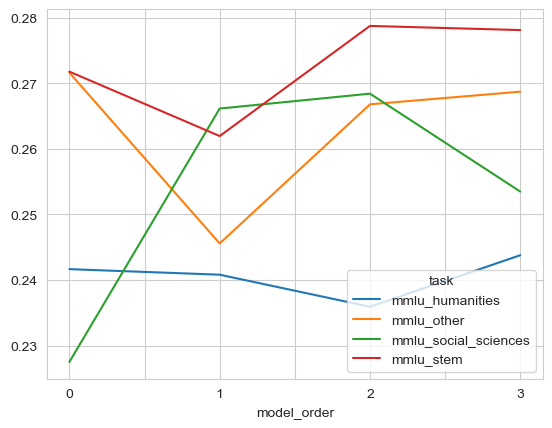

In [43]:
df_pivot_llm.loc['DK'].iloc[:,:-1].T.plot()

<Axes: xlabel='model_order'>

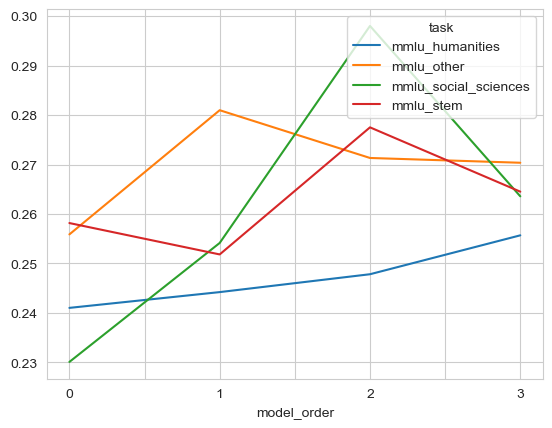

In [44]:
df_pivot_stacked.loc['DK'].iloc[:,:-1].T.plot()

In [45]:
df_all_clean.drop_duplicates()

,model_type,model_order,model,category,task,metric,metric_std
0,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english,0.607036,0.104245
1,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english_age,0.692308,0.388829
2,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english_autre,0.636364,2.150788
3,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english_disability,0.753846,0.640899
4,Stacked,0,StackLLM_7B_300BToken,Bias,crows_pairs_english_gender,0.659375,0.230166
...,...,...,...,...,...,...,...
355,LLM,3,llm_7b_m3_prompt,Rs,hellaswag,0.420733,0.004927
356,LLM,3,llm_7b_m3_prompt,Rs,mathqa,0.222446,0.007613
357,LLM,3,llm_7b_m3_prompt,Rs,mutual,0.225734,0.014053
358,LLM,3,llm_7b_m3_prompt,Rs,piqa,0.683351,0.010853


In [46]:
df_pivot = df_all_clean.drop_duplicates().pivot(index=['model_type','category','task'], columns='model_order', values='metric')
df_pivot_std = df_all_clean.drop_duplicates().pivot(index=['model_type','category','task'], columns='model_order', values='metric_std')
df_pivot.reset_index(inplace=True)
df_pivot_std.reset_index(inplace=True)

In [ ]:
df_pivot.to_clipboard()

In [48]:
df_pivot.query('task == "mmlu_stem"')

model_order,model_type,category,task,0,1,2,3
25,LLM,DK,mmlu_stem,0.271805,0.261973,0.278782,0.278148
58,Stacked,DK,mmlu_stem,0.258167,0.251824,0.277513,0.264510


In [49]:
df_rel_drops

1         2         3
category task                                                                 
Bias     crows_pairs_english                     -0.025540  0.009823 -0.009823
         crows_pairs_english_age                  0.015873  0.190476  0.126984
         crows_pairs_english_autre               -0.142857 -0.142857 -0.142857
         crows_pairs_english_disability           0.061224  0.081633  0.040816
         crows_pairs_english_gender               0.090047  0.118483  0.075829
         crows_pairs_english_nationality         -0.067797  0.016949  0.016949
         crows_pairs_english_physical_appearance  0.000000  0.134615  0.153846
         crows_pairs_english_race_color          -0.067460 -0.095238 -0.103175
         crows_pairs_english_religion             0.060976  0.097561  0.048780
         crows_pairs_english_sexual_orientation  -0.215385 -0.200000 -0.138462
         crows_pairs_english_socioeconomic       -0.127119 -0.093220 -0.127119
         crows_pairs_french                       0.009467 -0.030769 -0.036686
         crows_pairs_french_age                   0.000000  0.020408 -0.102041
         crows_pairs_french_autre                -0.400000 -0.200000 -0.400000
         crows_pairs_french_disability            0.054054  0.108108  0.108108
         crows_pairs_french_gender                0.102410  0.114458  0.048193
         crows_pairs_french_nationality          -0.133333 -0.188889 -0.211111
         crows_pairs_french_physical_appearance  -0.125000 -0.075000 -0.125000
         crows_pairs_french_race_color           -0.057895 -0.273684 -0.189474
         crows_pairs_french_religion              0.074074  0.185185  0.148148
         crows_pairs_french_sexual_orientation   -0.027027 -0.081081 -0.027027
         crows_pairs_french_socioeconomic         0.140351  0.122807  0.131579
DK       mmlu_humanities                         -0.013228 -0.028219 -0.060847
         mmlu_other                              -0.098113 -0.060377 -0.056604
         mmlu_social_sciences                    -0.104520 -0.295198 -0.145480
         mmlu_stem                                0.024570 -0.074939 -0.024570
RC       race                                     0.049479  0.070312  0.083333
Rs       boolq                                    0.127230  0.116432  0.194836
         hellaswag                                0.097928  0.102228  0.108679
         mathqa                                   0.055480  0.005413  0.005413
         mutual                                   0.000000  0.000000  0.000000
         piqa                                     0.067870  0.067148  0.067148
         winogrande                               0.077111  0.094247  0.123623

In [50]:
df_pivot.columns

Index(['model_type', 'category', 'task', '0', '1', '2', '3'], dtype='object', name='model_order')

In [51]:
rel_drops = {}
for col in ['0', '1', '2', '3']:
    if col != '0':
        rel_drops[col] = (df_pivot['0'] - df_pivot[col]) / df_pivot['0']

df_rel_drops = pd.DataFrame(rel_drops)
df_pivot['FG'] = df_rel_drops.mean(axis=1) * 100

In [52]:
df_melt = pd.melt(df_pivot, id_vars=['model_type','category','task'], var_name='model_order', value_name='metric')

In [53]:
df_melt_std = pd.melt(df_pivot_std, id_vars=['model_type','category','task'], var_name='model_order', value_name='metric_std')

In [54]:
df_pivot.query('task == "race"')

model_order,model_type,category,task,0,1,2,3,FG
26,LLM,RC,race,0.371292,0.325359,0.341627,0.313876,11.941581
59,Stacked,RC,race,0.367464,0.349282,0.341627,0.336842,6.770833


In [55]:
df_pivot_std.query('task == "race"')

model_order,model_type,category,task,0,1,2,3
26,LLM,RC,race,0.014953,0.014500,0.014678,0.014362
59,Stacked,RC,race,0.014921,0.014755,0.014678,0.014628


In [56]:
df_pivot.set_index(['model_type','category','task']).pct_change(axis=1).iloc[:,:-1].reset_index().query('category != "Bias"')

model_order,model_type,category,task,0,1,2,3
22,LLM,DK,mmlu_humanities,NaN,-0.003518,-0.020300,0.033333
23,LLM,DK,mmlu_other,NaN,-0.095972,0.086501,0.007238
24,LLM,DK,mmlu_social_sciences,NaN,0.170000,0.008547,-0.055690
25,LLM,DK,mmlu_stem,NaN,-0.036173,0.064165,-0.002275
26,LLM,RC,race,NaN,-0.123711,0.050000,-0.081232
27,LLM,Rs,boolq,NaN,-0.235900,0.017972,0.150694
28,LLM,Rs,hellaswag,NaN,-0.110050,0.009799,-0.023799
29,LLM,Rs,mathqa,NaN,0.024390,-0.047619,-0.023529
30,LLM,Rs,mutual,NaN,0.000000,0.000000,0.000000
31,LLM,Rs,piqa,NaN,-0.062958,-0.015625,-0.003175


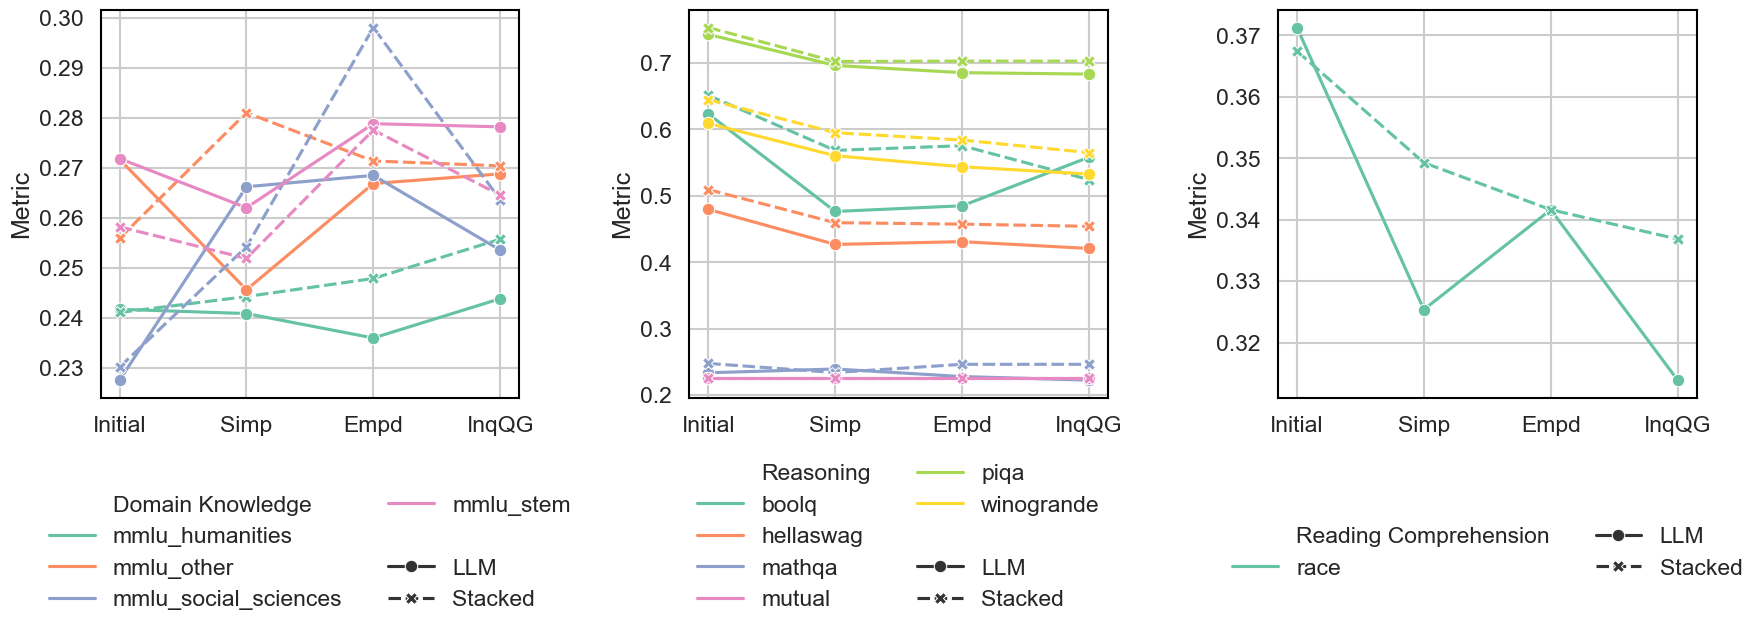

In [57]:
custom_labels = ["Initial", "Simp", "Empd", "InqQG"]
sns.set_palette("Set2")

df_melt_wo_fg = df_melt.query('model_order != "FG"')
#fig, axs = plt.subplots(1,3, figsize=(12,5))
sns.set_style('whitegrid')
sns.set_context('talk')
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharex=True)
sns.lineplot(data=df_melt_wo_fg.query('category == "DK"'), x='model_order', y='metric', hue='task', style='model_type', markers=True, ax=axs[0])
sns.lineplot(data=df_melt_wo_fg.query('category == "Rs"'), x='model_order', y='metric', hue='task', style='model_type', markers=True, ax=axs[1])
sns.lineplot(data=df_melt_wo_fg.query('category == "RC"'), x='model_order', y='metric', hue='task', style='model_type', markers=True, ax=axs[2])
legend_dict = {0: 'Domain Knowledge', 1: 'Reasoning', 2: 'Reading Comprehension'}
for ax in axs:
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5,-0.6), 
        ncol=2, title=None, frameon=False
    )
    legend = ax.get_legend()
    legend.texts[0].set_text(legend_dict[axs.tolist().index(ax)])
    # remove text from legend.texts[1]
    legend.texts[-3].set_text("")

    ax.set_xlabel("")
    ax.set_ylabel("Metric")
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(custom_labels)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Set the border color (dark)
        spine.set_linewidth(1.5)        # Adjust the line width for visibility
    

    
plt.tight_layout()

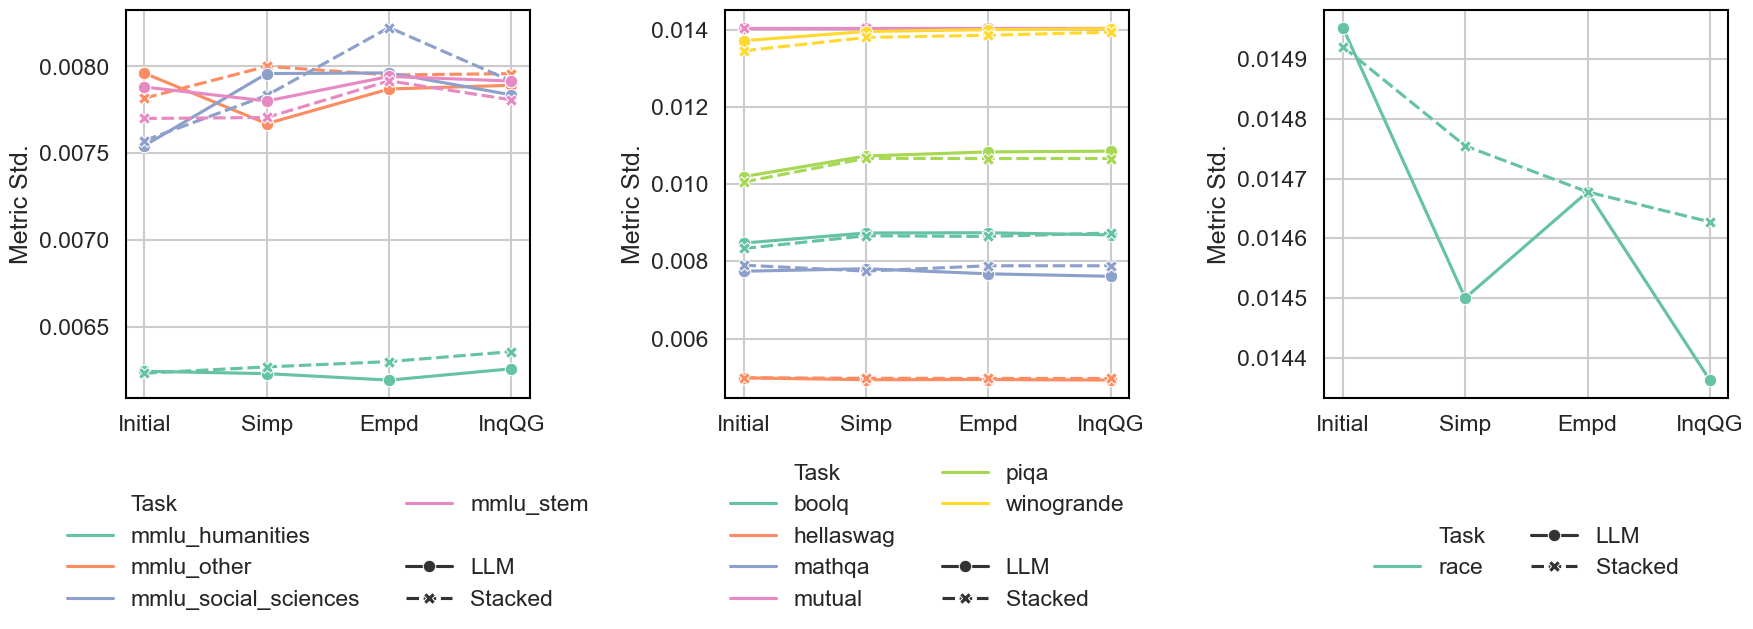

In [58]:
custom_labels = ["Initial", "Simp", "Empd", "InqQG"]
sns.set_palette("Set2")

df_melt_wo_fg = df_melt_std.query('model_order != "FG"')
#fig, axs = plt.subplots(1,3, figsize=(12,5))
sns.set_style('whitegrid')
sns.set_context('talk')
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharex=True)
sns.lineplot(data=df_melt_wo_fg.query('category == "DK"'), x='model_order', y='metric_std', hue='task', style='model_type', markers=True, ax=axs[0])
sns.lineplot(data=df_melt_wo_fg.query('category == "Rs"'), x='model_order', y='metric_std', hue='task', style='model_type', markers=True, ax=axs[1])
sns.lineplot(data=df_melt_wo_fg.query('category == "RC"'), x='model_order', y='metric_std', hue='task', style='model_type', markers=True, ax=axs[2])
for ax in axs:
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5,-0.6), 
        ncol=2, title=None, frameon=False
    )
    legend = ax.get_legend()
    legend.texts[0].set_text("Task")
    # remove text from legend.texts[1]
    legend.texts[-3].set_text("")

    ax.set_xlabel("")
    ax.set_ylabel("Metric Std.")
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(custom_labels)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Set the border color (dark)
        spine.set_linewidth(1.5)        # Adjust the line width for visibility
    

    
plt.tight_layout()

ValueError: Could not interpret value `metric` for `y`. An entry with this name does not appear in `data`.

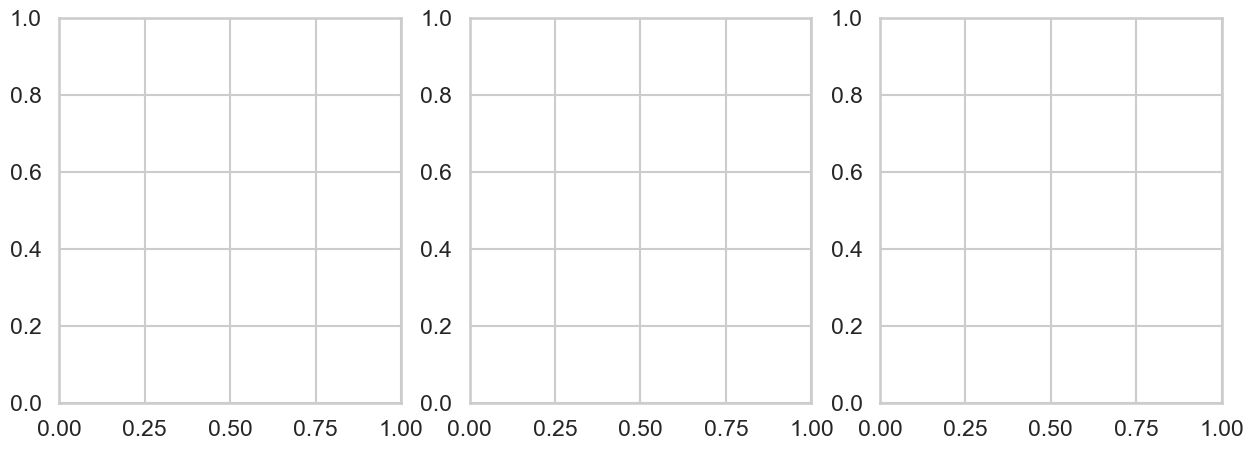

In [59]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.lineplot(data=df_melt_wo_fg.query('category == "DK"'), x='model_order', y='metric', hue='task', style='model_type', markers=True, ax=axs[0])
sns.lineplot(data=df_melt_wo_fg.query('category == "Rs"'), x='model_order', y='metric', hue='task', style='model_type', markers=True, ax=axs[1])
sns.lineplot(data=df_melt_wo_fg.query('category == "RC"'), x='model_order', y='metric', hue='task', style='model_type', markers=True, ax=axs[2])
for ax in axs:
    # 1. Get the existing legend’s handles and labels
    handles, labels = ax.get_legend_handles_labels()
    
    # 2. Separate them into tasks vs. model_type
    #    (You might identify tasks by name, or by some known list)
    task_handles = []
    task_labels = []
    model_handles = []
    model_labels = []
    
    # Example: suppose you know the distinct labels for tasks vs. model_type
    known_tasks = {
        "mmlu_humanities","mmlu_other","mmlu_social_sciences","mmlu_stem",
        "boolq","hellaswag","mathqa","mutual","piqa","winogrande","race"
    }
    for h, l in zip(handles, labels):
        if l in known_tasks:
            task_handles.append(h)
            task_labels.append(l)
        else:
            model_handles.append(h)
            model_labels.append(l)
    
    # 3. Reorder them so that tasks come first, then model_type
    new_handles = task_handles + model_handles
    new_labels = task_labels + model_labels
    
    # 4. Create a new legend with 2 columns
    #    (ncol=2 typically arranges items row-wise:
    #       row1: item0, item1
    #       row2: item2, item3, etc.)
    ax.legend(new_handles, new_labels, ncol=2, title=None, frameon=True)
    
    # 5. Now reposition it at the bottom (or wherever) with move_legend
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(0.5, 1),  # or adjust Y further down if needed
        ncol=2,
        title=None
    )

plt.tight_layout()
plt.show()

In [ ]:
df_tests = pd.read_csv(r'C:\Users\esual\Documents\local_repos\growth-vs-forgetting\src\utils\combined_metrics.csv')
df_test_n = pd.read_csv(r'C:\Users\esual\Documents\local_repos\growth-vs-forgetting\src\utils\combined_metrics_new.csv')

In [ ]:
df_tests['model_type'] = df_tests['model_folder'].str.split('_').str[0]
df_tests['model_size'] = df_tests['model_folder'].str.split('_').str[1]
df_tests['model_stage'] = df_tests['model_folder'].str.split('_').str[2]

In [ ]:
df_tests

,root,model_folder,test_dir,run_name,bleu,rouge1,rouge2,rougeL,sari,predict_runtime,...,predict_steps_per_second,bertscore_f1,bertscore_P,bertscore_R,eval_runtime,eval_samples_per_second,eval_steps_per_second,model_type,model_size,model_stage
0,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,stack_7b_m0_prompt,test,stack_7b_m0_inf_prompt_e1,0.052774,0.217819,0.139451,0.206218,41.931543,1248.7574,...,0.100,NaN,NaN,NaN,NaN,NaN,NaN,stack,7b,m0
1,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,stack_7b_m0_prompt,test_t2,stack_7b_m0_inf_prompt_e2,0.001730,0.034651,0.005198,0.030722,NaN,4883.2233,...,0.054,0.786671,0.748762,0.829189,NaN,NaN,NaN,stack,7b,m0
2,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,llm_7b_m0_prompt,test,llm_7b_m0_inf_prompt_e1,0.038457,0.141175,0.087155,0.136469,38.461934,1253.9866,...,0.100,NaN,NaN,NaN,NaN,NaN,NaN,llm,7b,m0
3,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,llm_7b_m0_prompt,test_t2,llm_7b_m0_inf_t2_prompt,0.001749,0.032787,0.005401,0.031595,NaN,4873.3825,...,0.054,0.785026,0.749321,0.824780,NaN,NaN,NaN,llm,7b,m0
4,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,stack_3b_m1_promptwiki_auto,test_3078,stack_3b_m1_inf_prompt_e3,0.242325,0.468156,0.304231,0.426014,40.266836,658.7578,...,0.380,NaN,NaN,NaN,NaN,NaN,NaN,stack,3b,m1
5,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,stack_3b_m1_promptwiki_auto,test_1026,stack_3b_m1_inf_prompt_e1,0.203972,0.473151,0.319534,0.436610,40.231851,959.8948,...,0.260,NaN,NaN,NaN,NaN,NaN,NaN,stack,3b,m1
6,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,llm_3b_m1,test_512,llm_3b_m1_inf_exp1,0.099783,0.415839,0.269795,0.380711,40.837342,12444.0349,...,0.007,NaN,NaN,NaN,NaN,NaN,NaN,llm,3b,m1
7,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,llm_3b_m1,test,llm_3b_m1_inf_exp1,0.176688,0.428906,0.279530,0.393462,41.130840,3307.4879,...,0.076,NaN,NaN,NaN,NaN,NaN,NaN,llm,3b,m1
8,/dss/dsshome1/02/ra95kix2/seminar_fma/growth-v...,stack_7b_m1_prompt,test_2063,NaN,0.246433,0.474990,0.312360,0.431504,41.161267,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stack,7b,m1
9,/dss/dsshome1/02/ra95kix2/seminar_fma/growth-v...,stack_7b_m1_prompt,test_6189,stack_7b_m1_inf_prompt_a1,0.272609,0.466247,0.301175,0.421517,40.767990,579.8059,...,0.216,NaN,NaN,NaN,NaN,NaN,NaN,stack,7b,m1


In [ ]:
df_inf = pd.concat([df_tests, df_test_n])

In [ ]:
df_inf['model_type'] = df_inf['model_folder'].str.split('_').str[0]
df_inf['model_size'] = df_inf['model_folder'].str.split('_').str[1]
df_inf['model_stage'] = df_inf['model_folder'].str.split('_').str[2]

In [ ]:
df_inf.json_name = df_inf.json_name.fillna(value='metrics')

In [ ]:
df_inf.reset_index(drop=True, inplace=True)

In [ ]:
df_inf.shape

(48, 22)

In [ ]:
df_inf.model_type = np.where(df_inf.model_size == 'StackLLM', 'stack', df_inf.model_type)
df_inf.model_type = np.where(df_inf.model_size == 'LLM', 'llm', df_inf.model_type)

df_inf.model_size = np.where(df_inf.model_size == 'StackLLM', '7b', df_inf.model_size)
df_inf.model_size = np.where(df_inf.model_size == 'LLM', '7b', df_inf.model_size)

df_inf.model_stage = np.where(df_inf.model_stage == '7B', 'm0', df_inf.model_stage)

In [ ]:
df_inf_7b = df_inf.query('model_size == "7b"')

In [ ]:
df_inf_7b.query('model_stage in ["m0", "m1"] and sari > .0').sort_values('sari')

,root,model_folder,test_dir,run_name,bleu,rouge1,rouge2,rougeL,sari,predict_runtime,...,bertscore_f1,bertscore_P,bertscore_R,eval_runtime,eval_samples_per_second,eval_steps_per_second,model_type,model_size,model_stage,json_name
36,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,llm-stacking_LLM_7B_300BToken,test_simp,llm-stacking_LLM_7B_300BToken_simp,0.017631,0.215459,0.079525,0.184298,31.081505,558.2813,...,NaN,NaN,NaN,NaN,NaN,NaN,llm,7b,m0,metrics
40,/dss/dsshome1/02/ra95kix2/seminar_fma/growth-v...,stack_7b_m1_prompt,test_checkpoint-6189,checkpoint-6189_simp,0.045115,0.318275,0.112433,0.275295,32.302596,479.8786,...,NaN,NaN,NaN,NaN,NaN,NaN,stack,7b,m1,metrics
30,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,llm-stacking_StackLLM_7B_300BToken,test_simp,llm-stacking_StackLLM_7B_300BToken_simp,0.025571,0.281563,0.100539,0.238696,32.323559,556.0698,...,NaN,NaN,NaN,NaN,NaN,NaN,stack,7b,m0,metrics
43,/dss/dsshome1/02/ra95kix2/seminar_fma/growth-v...,llm_7b_m1_prompt,test_checkpoint-6189,checkpoint-6189_simp,0.034595,0.313953,0.101730,0.262661,32.335637,493.7212,...,NaN,NaN,NaN,NaN,NaN,NaN,llm,7b,m1,metrics
2,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,llm_7b_m0_prompt,test,llm_7b_m0_inf_prompt_e1,0.038457,0.141175,0.087155,0.136469,38.461934,1253.9866,...,NaN,NaN,NaN,NaN,NaN,NaN,llm,7b,m0,metrics
28,/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra95ki...,llm_7b_m0_prompt,test,llm_7b_m0_inf_prompt_e1,0.038457,0.141175,0.087155,0.136469,38.461934,1253.9866,...,NaN,NaN,NaN,NaN,NaN,NaN,llm,7b,m0,metrics
15,/dss/dsshome1/02/ra95kix2/seminar_fma/growth-v...,llm_7b_m1_prompt,test_6189,llm_7b_m1_inf_prompt_a1,0.238187,0.454432,0.278664,0.403743,39.941513,586.6477,...,NaN,NaN,NaN,NaN,NaN,NaN,llm,7b,m1,metrics
10,/dss/dsshome1/02/ra95kix2/seminar_fma/growth-v...,stack_7b_m1_prompt,test_6189_2,stack_7b_m1_inf_prompt_a2,0.272609,0.466361,0.300922,0.421786,40.767990,581.8534,...,NaN,NaN,NaN,NaN,NaN,NaN,stack,7b,m1,metrics
9,/dss/dsshome1/02/ra95kix2/seminar_fma/growth-v...,stack_7b_m1_prompt,test_6189,stack_7b_m1_inf_prompt_a1,0.272609,0.466247,0.301175,0.421517,40.767990,579.8059,...,NaN,NaN,NaN,NaN,NaN,NaN,stack,7b,m1,metrics
8,/dss/dsshome1/02/ra95kix2/seminar_fma/growth-v...,stack_7b_m1_prompt,test_2063,NaN,0.246433,0.474990,0.312360,0.431504,41.161267,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,stack,7b,m1,metrics


# cool graph under construction

In [61]:
df_pivot

model_order,model_type,category,task,0,1,2,3,FG
0,LLM,Bias,crows_pairs_english,0.633870,0.564699,0.569469,0.558140,11.006585
1,LLM,Bias,crows_pairs_english_age,0.692308,0.648352,0.593407,0.615385,10.582011
2,LLM,Bias,crows_pairs_english_autre,0.727273,0.636364,0.545455,0.545455,20.833333
3,LLM,Bias,crows_pairs_english_disability,0.738462,0.692308,0.646154,0.707692,7.638889
4,LLM,Bias,crows_pairs_english_gender,0.612500,0.568750,0.600000,0.587500,4.421769
...,...,...,...,...,...,...,...,...
61,Stacked,Rs,hellaswag,0.509460,0.459570,0.457379,0.454093,10.294501
62,Stacked,Rs,mathqa,0.247571,0.233836,0.246231,0.246231,2.210194
63,Stacked,Rs,mutual,0.225734,0.225734,0.225734,0.225734,0.000000
64,Stacked,Rs,piqa,0.753536,0.702394,0.702938,0.702938,6.738869


In [70]:
df_pivot.groupby(['model_type','category']).FG.mean().reset_index()

,model_type,category,FG
0,LLM,Bias,6.729888
1,LLM,DK,-2.785366
2,LLM,RC,11.941581
3,LLM,Rs,8.216758
4,Stacked,Bias,-2.537437
5,Stacked,DK,-7.812695
6,Stacked,RC,6.770833
7,Stacked,Rs,7.282146


In [141]:
df_pivot.query("`task`.str.contains('french') == False")


model_order,model_type,category,task,0,1,2,3,FG
0,LLM,Bias,crows_pairs_english,0.633870,0.564699,0.569469,0.558140,11.006585
1,LLM,Bias,crows_pairs_english_age,0.692308,0.648352,0.593407,0.615385,10.582011
2,LLM,Bias,crows_pairs_english_autre,0.727273,0.636364,0.545455,0.545455,20.833333
3,LLM,Bias,crows_pairs_english_disability,0.738462,0.692308,0.646154,0.707692,7.638889
4,LLM,Bias,crows_pairs_english_gender,0.612500,0.568750,0.600000,0.587500,4.421769
5,LLM,Bias,crows_pairs_english_nationality,0.574074,0.532407,0.509259,0.481481,11.559140
6,LLM,Bias,crows_pairs_english_physical_appearance,0.708333,0.722222,0.708333,0.680556,0.653595
7,LLM,Bias,crows_pairs_english_race_color,0.555118,0.460630,0.474409,0.454724,16.548463
8,LLM,Bias,crows_pairs_english_religion,0.801802,0.630631,0.567568,0.567568,26.591760
9,LLM,Bias,crows_pairs_english_sexual_orientation,0.795699,0.698925,0.741935,0.720430,9.459459


In [140]:
df_pivot

model_order,model_type,category,task,0,1,2,3,FG
0,LLM,Bias,crows_pairs_english,0.633870,0.564699,0.569469,0.558140,11.006585
1,LLM,Bias,crows_pairs_english_age,0.692308,0.648352,0.593407,0.615385,10.582011
2,LLM,Bias,crows_pairs_english_autre,0.727273,0.636364,0.545455,0.545455,20.833333
3,LLM,Bias,crows_pairs_english_disability,0.738462,0.692308,0.646154,0.707692,7.638889
4,LLM,Bias,crows_pairs_english_gender,0.612500,0.568750,0.600000,0.587500,4.421769
...,...,...,...,...,...,...,...,...
61,Stacked,Rs,hellaswag,0.509460,0.459570,0.457379,0.454093,10.294501
62,Stacked,Rs,mathqa,0.247571,0.233836,0.246231,0.246231,2.210194
63,Stacked,Rs,mutual,0.225734,0.225734,0.225734,0.225734,0.000000
64,Stacked,Rs,piqa,0.753536,0.702394,0.702938,0.702938,6.738869


In [139]:
df_pivot.query("'french' not in task")


model_order,model_type,category,task,0,1,2,3,FG
0,LLM,Bias,crows_pairs_english,0.633870,0.564699,0.569469,0.558140,11.006585
1,LLM,Bias,crows_pairs_english_age,0.692308,0.648352,0.593407,0.615385,10.582011
2,LLM,Bias,crows_pairs_english_autre,0.727273,0.636364,0.545455,0.545455,20.833333
3,LLM,Bias,crows_pairs_english_disability,0.738462,0.692308,0.646154,0.707692,7.638889
4,LLM,Bias,crows_pairs_english_gender,0.612500,0.568750,0.600000,0.587500,4.421769
...,...,...,...,...,...,...,...,...
61,Stacked,Rs,hellaswag,0.509460,0.459570,0.457379,0.454093,10.294501
62,Stacked,Rs,mathqa,0.247571,0.233836,0.246231,0.246231,2.210194
63,Stacked,Rs,mutual,0.225734,0.225734,0.225734,0.225734,0.000000
64,Stacked,Rs,piqa,0.753536,0.702394,0.702938,0.702938,6.738869


C:\Users\esual\AppData\Local\Temp\ipykernel_8992\3106567004.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(new_y_labels)


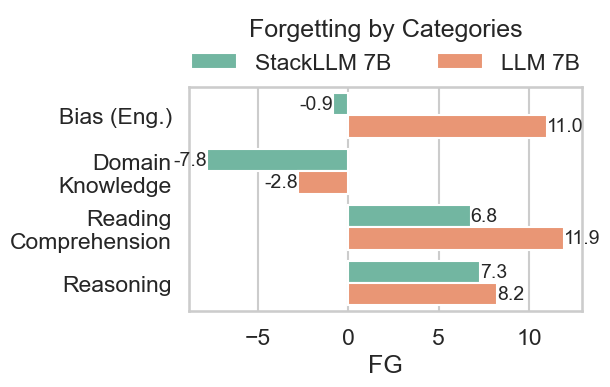

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.offsetbox as offsetbox

sns.set_palette("Set2")
sns.set_style('whitegrid')
sns.set_context('talk')

# Create the barplot
g = sns.barplot(
    data=df_pivot.query("`task`.str.contains('french') == False and `task`.str.contains('crows_pairs_english_') == False").groupby(['model_type','category']).FG.mean().reset_index().sort_values('model_type', ascending=False),
    x='FG', 
    y='category', 
    hue='model_type', 
    orient='y'
)

new_y_labels = ['Bias (Eng.)', 'Domain\nKnowledge', 'Reading\nComprehension', 'Reasoning']  

# Set the new y-axis tick labels
g.set_yticklabels(new_y_labels)

# Extract handles and labels correctly from the barplot
handles, labels = g.get_legend_handles_labels()

# Define your custom labels
custom_labels = ['StackLLM 7B', 'LLM 7B']

# Set the legend using the correct handles and custom labels
g.legend(handles, custom_labels, title='Forgetting by Categories', loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, frameon=False)

g.bar_label(g.containers[0], fontsize=14, fmt='%.1f')
g.bar_label(g.containers[1], fontsize=14, fmt='%.1f')
g.set_ylabel("")



plt.tight_layout()
plt.show()

In [124]:
g.containers[0]

<BarContainer object of 3 artists>

In [150]:
df_pivot.query('category == "Bias" and `task`.str.contains("french") == False')

model_order,model_type,category,task,0,1,2,3,FG
0,LLM,Bias,crows_pairs_english,0.633870,0.564699,0.569469,0.558140,11.006585
1,LLM,Bias,crows_pairs_english_age,0.692308,0.648352,0.593407,0.615385,10.582011
2,LLM,Bias,crows_pairs_english_autre,0.727273,0.636364,0.545455,0.545455,20.833333
3,LLM,Bias,crows_pairs_english_disability,0.738462,0.692308,0.646154,0.707692,7.638889
4,LLM,Bias,crows_pairs_english_gender,0.612500,0.568750,0.600000,0.587500,4.421769
5,LLM,Bias,crows_pairs_english_nationality,0.574074,0.532407,0.509259,0.481481,11.559140
6,LLM,Bias,crows_pairs_english_physical_appearance,0.708333,0.722222,0.708333,0.680556,0.653595
7,LLM,Bias,crows_pairs_english_race_color,0.555118,0.460630,0.474409,0.454724,16.548463
8,LLM,Bias,crows_pairs_english_religion,0.801802,0.630631,0.567568,0.567568,26.591760
9,LLM,Bias,crows_pairs_english_sexual_orientation,0.795699,0.698925,0.741935,0.720430,9.459459


In [164]:
df_pivot_bias = df_pivot.query('category == "Bias" and `task`.str.contains("french") == False')
df_pivot_bias['task'] = df_pivot_bias['task'].str.replace('crows_pairs_english_', '')

C:\Users\esual\AppData\Local\Temp\ipykernel_8992\3222520347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_bias['task'] = df_pivot_bias['task'].str.replace('crows_pairs_english_', '')


C:\Users\esual\AppData\Local\Temp\ipykernel_8992\2729179479.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_bias['task'] = np.where(df_pivot_bias['task'] == 'crows_pairs_english', 'CrowsPairs Weighted Avg.', df_pivot_bias['task'])
C:\Users\esual\AppData\Local\Temp\ipykernel_8992\2729179479.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot_bias['task'] = df_pivot_bias['task'].str.replace('_', ' ')
C:\Users\esual\AppData\Local\Temp\ipykernel_8992\2729179479.py:13: SettingWithCopyWarn

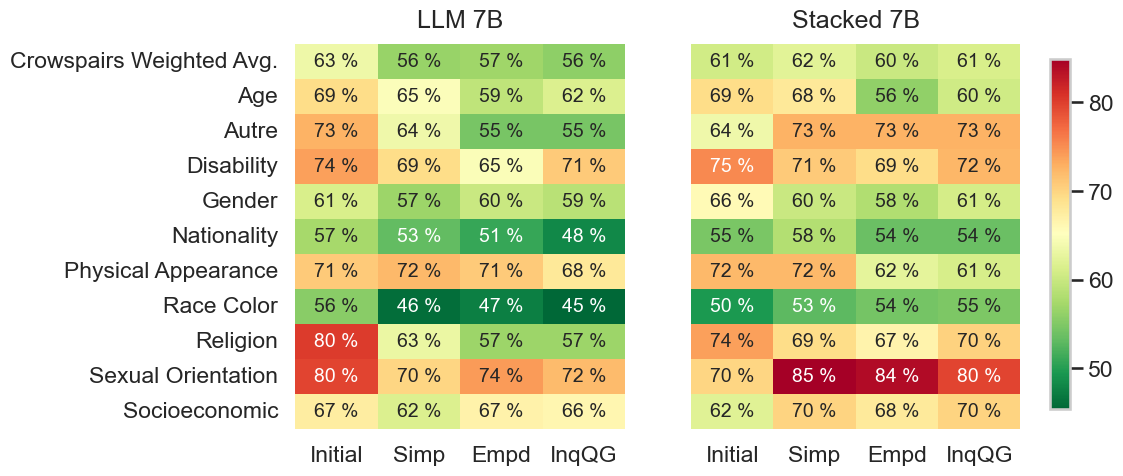

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_palette("Set2")
sns.set_style('whitegrid')
sns.set_context('talk')

df_pivot_bias['task'] = np.where(df_pivot_bias['task'] == 'crows_pairs_english', 'CrowsPairs Weighted Avg.', df_pivot_bias['task'])
df_pivot_bias['task'] = df_pivot_bias['task'].str.replace('_', ' ')
# make first letter capital
df_pivot_bias['task'] = df_pivot_bias['task'].str.title()

# 1) Prepare your data
llm_data = (
    df_pivot_bias.query('model_type == "LLM"')
    .drop(columns=['category', 'FG', 'model_type'])
    .set_index('task') * 100
)
stacked_data = (
    df_pivot_bias.query('model_type == "Stacked"')
    .drop(columns=['category', 'FG', 'model_type'])
    .set_index('task') * 100
)

# 2) Compute the overall min and max for a shared color range
combined_min = min(llm_data.values.min(), stacked_data.values.min())
combined_max = max(llm_data.values.max(), stacked_data.values.max())

# 3) Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
palette=plt.get_cmap('RdYlGn').reversed()

# 4) Plot each heatmap without its own colorbar, 
#    and set a common vmin, vmax, and cmap
hm1 = sns.heatmap(
    llm_data, annot=True, ax=axs[0],
    cmap=palette, 
    vmin=combined_min, vmax=combined_max,
    cbar=False,
    annot_kws={"fontsize": 14}
)
hm2 = sns.heatmap(
    stacked_data, annot=True, ax=axs[1],
    cmap=palette, 
    vmin=combined_min, vmax=combined_max,
    cbar=False,
    annot_kws={"fontsize": 14}
)

# 5) Manually add one colorbar to the figure.
#    First, make some room on the right for the colorbar:
fig.subplots_adjust(right=0.85)

# Create an axis for the colorbar
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]

# Option A: Use a ScalarMappable with your shared norm/cmap
norm = plt.Normalize(combined_min, combined_max)
sm = plt.cm.ScalarMappable(norm=norm, cmap=palette)
sm.set_array([])  # dummy array for the colorbar
fig.colorbar(sm, cax=cbar_ax)


## 6) Add titles and labels
axs[0].set_title("LLM 7B", y=1.02)
axs[1].set_title("Stacked 7B", y=1.02)
custom_labels = ["Initial", "Simp", "Empd", "InqQG"]
for ax in axs:
    ax.set_xticklabels(custom_labels)
    ax.set_xlabel("")
    ax.set_ylabel("")
    for t in ax.texts: t.set_text(t.get_text() + " %")

#plt.tight_layout()
#plt.show()
#
#

In [210]:
custom_labels

['StackLLM 7B', 'LLM 7B']

In [160]:
df_pivot.query('category == "Bias" and `task`.str.contains("french") == False and model_type == "Stacked"')

model_order,model_type,category,task,0,1,2,3,FG
33,Stacked,Bias,crows_pairs_english,0.607036,0.622540,0.601073,0.612999,-0.851343
34,Stacked,Bias,crows_pairs_english_age,0.692308,0.681319,0.560440,0.604396,11.111111
35,Stacked,Bias,crows_pairs_english_autre,0.636364,0.727273,0.727273,0.727273,-14.285714
36,Stacked,Bias,crows_pairs_english_disability,0.753846,0.707692,0.692308,0.723077,6.122449
37,Stacked,Bias,crows_pairs_english_gender,0.659375,0.600000,0.581250,0.609375,9.478673
38,Stacked,Bias,crows_pairs_english_nationality,0.546296,0.583333,0.537037,0.537037,-1.129944
39,Stacked,Bias,crows_pairs_english_physical_appearance,0.722222,0.722222,0.625000,0.611111,9.615385
40,Stacked,Bias,crows_pairs_english_race_color,0.496063,0.529528,0.543307,0.547244,-8.862434
41,Stacked,Bias,crows_pairs_english_religion,0.738739,0.693694,0.666667,0.702703,6.910569
42,Stacked,Bias,crows_pairs_english_sexual_orientation,0.698925,0.849462,0.838710,0.795699,-18.461538
